In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Step 2: Load the Iris dataset
iris = load_iris()

In [2]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
# Display all keys in the iris object
print(iris.keys())


print(iris['target_names'])
print(iris['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Load features and target
X = iris.data  # Features: Sepal and petal measurements
y = iris.target  # Labels: Class indices (0, 1, 2)

print("Type of X (features):", type(X))
print("Type of y (target):", type(y))


print("Data type of elements in X:", X.dtype)
print("Data type of elements in y:", y.dtype)


# Display shapes for confirmation
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

# View the first few rows
print("First 5 rows of features:\n", X[:5])
print("First 5 target labels:", y[:5])

Type of X (features): <class 'numpy.ndarray'>
Type of y (target): <class 'numpy.ndarray'>
Data type of elements in X: float64
Data type of elements in y: int64
Features shape (X): (150, 4)
Target shape (y): (150,)
First 5 rows of features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 target labels: [0 0 0 0 0]


In [5]:
import numpy as np

# Check for missing values in features
missing_in_X = np.isnan(X).any()
print("Missing values in features (X):", missing_in_X)

# Check for missing values in target
missing_in_y = np.isnan(y).any()
print("Missing values in target (y):", missing_in_y)

Missing values in features (X): False
Missing values in target (y): False


In [6]:
import numpy as np

# Compute mean and standard deviation for each feature
mean = np.mean(X, axis=0)  # Mean of each column (feature)
std = np.std(X, axis=0)    # Standard deviation of each column (feature)

# Scale the features
X_scaled = (X - mean) / std

# Verify the scaled data
print("First 5 rows of original features:\n", X[:5])
print("First 5 rows of scaled features:\n", X_scaled[:5])

# Check the new mean and standard deviation
print("Mean of scaled features (should be close to 0):", np.mean(X_scaled, axis=0))
print("Standard deviation of scaled features (should be close to 1):", np.std(X_scaled, axis=0))

First 5 rows of original features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 rows of scaled features:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
Mean of scaled features (should be close to 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviation of scaled features (should be close to 1): [1. 1. 1. 1.]


In [7]:
# Number of unique classes
num_classes = len(np.unique(y))

# Create one-hot encoded labels
y_one_hot = np.eye(num_classes)[y]

# Verify the encoding
print("First 5 one-hot encoded labels:\n", y_one_hot[:5])

First 5 one-hot encoded labels:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [8]:
np.eye(num_classes)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
import pandas as pd

# Convert scaled features into a DataFrame for clarity
df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)

# Compute the correlation matrix
correlation_matrix = df_scaled.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


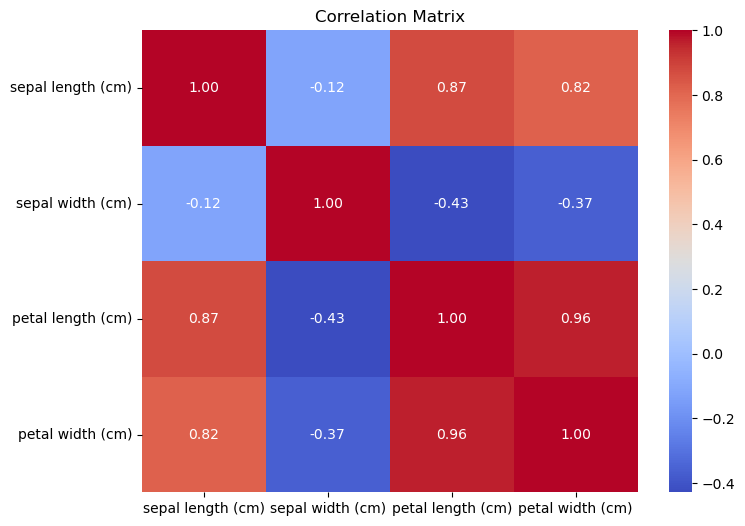

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
# Remove the 'petal width (cm)' column (index 3) from X_scaled
X_reduced = np.delete(X_scaled, 3, axis=1)

# Verify the new shape
print("Shape of original features (X_scaled):", X_scaled.shape)
print("Shape of reduced features (X_reduced):", X_reduced.shape)

Shape of original features (X_scaled): (150, 4)
Shape of reduced features (X_reduced): (150, 3)


In [12]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = X_reduced.shape[0]

# Shuffle the indices
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Define the split ratio
split_ratio = 0.8
split_index = int(num_samples * split_ratio)

# Split the data
train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train = X_reduced[train_indices]
y_train = y_one_hot[train_indices]
X_test = X_reduced[test_indices]
y_test = y_one_hot[test_indices]

# Verify the shapes of the splits
print("Training set shapes (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shapes (X_test, y_test):", X_test.shape, y_test.shape)

Training set shapes (X_train, y_train): (120, 3) (120, 3)
Testing set shapes (X_test, y_test): (30, 3) (30, 3)


In [13]:
def softmax(logits):
    """
    Compute the softmax probabilities for a given set of logits.

    Parameters:
    logits (numpy.ndarray): The input logits of shape (N, C),
                            where N is the number of samples and C is the number of classes.

    Returns:
    numpy.ndarray: The softmax probabilities of shape (N, C).
    """
    # Subtract the max logit for numerical stability (broadcasting)
    logits_stable = logits - np.max(logits, axis=1, keepdims=True)
    
    # Compute exponentials
    exp_logits = np.exp(logits_stable)
    
    # Normalize to get probabilities
    softmax_probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    
    return softmax_probs

In [14]:
# Test softmax function
logits = np.array([[2.0, 1.0, 0.1],
                   [1.0, 3.0, 0.2]])

softmax_probs = softmax(logits)
print("Softmax probabilities:\n", softmax_probs)

Softmax probabilities:
 [[0.65900114 0.24243297 0.09856589]
 [0.11314284 0.8360188  0.05083836]]


In [15]:
def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss.

    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (N, C),
                            or as integers of shape (N,).
    y_pred (numpy.ndarray): Predicted probabilities of shape (N, C).

    Returns:
    float: The average cross-entropy loss.
    """
    # Ensure numerical stability by adding a small constant (epsilon)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # If labels are one-hot encoded
    if y_true.ndim == 2:
        loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    else:
        # If labels are integers (not one-hot encoded)
        loss = -np.sum(np.log(y_pred[np.arange(len(y_pred)), y_true])) / y_true.shape[0]
    
    return loss

In [16]:
# Dummy one-hot labels and predictions
y_true = np.array([[1, 0, 0],
                   [0, 1, 0],
                   [0, 0, 1]])
y_pred = np.array([[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1],
                   [0.2, 0.3, 0.5]])

loss = cross_entropy_loss(y_true, y_pred)
print("Cross-entropy loss (one-hot):", loss)

# Dummy integer labels and predictions
y_true_int = np.array([0, 1, 2])
loss_int = cross_entropy_loss(y_true_int, y_pred)
print("Cross-entropy loss (integer):", loss_int)

Cross-entropy loss (one-hot): 0.4243218919376292
Cross-entropy loss (integer): 0.4243218919376292


In [17]:
def forward_pass(X, weights, y_true=None):
    """
    Perform the forward pass and optionally compute the loss.

    Parameters:
    X (numpy.ndarray): Input features.
    weights (numpy.ndarray): Weights matrix.
    y_true (numpy.ndarray, optional): True labels (for loss computation).

    Returns:
    tuple: logits, predicted probabilities, and loss (if y_true is provided).
    """
    logits = np.dot(X, weights)
    y_pred = softmax(logits)
    loss = cross_entropy_loss(y_true, y_pred) if y_true is not None else None
    return logits, y_pred, loss


def compute_gradient(X, y_true, y_pred):
    """
    Compute the gradient of the cross-entropy loss with respect to the weights.

    Parameters:
    X (numpy.ndarray): Input features of shape (N, D).
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (N, C).
    y_pred (numpy.ndarray): Predicted probabilities of shape (N, C).

    Returns:
    numpy.ndarray: Gradient of shape (D, C).
    """
    # Number of samples
    N = X.shape[0]
    
    # Compute the gradient
    gradient = np.dot(X.T, (y_pred - y_true)) / N
    
    return gradient


def gradient_descent_step(X, y_true, weights, learning_rate):
    """
    Perform one step of gradient descent.

    Parameters:
    X (numpy.ndarray): Input features of shape (N, D).
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (N, C).
    weights (numpy.ndarray): Current weights of shape (D, C).
    learning_rate (float): Learning rate for updates.

    Returns:
    numpy.ndarray: Updated weights of shape (D, C).
    """
    # Perform the forward pass
    _, y_pred, _ = forward_pass(X, weights, y_true)
    
    # Compute the gradient
    gradient = compute_gradient(X, y_true, y_pred)
    
    # Update weights
    weights -= learning_rate * gradient
    
    return weights




def test_gradient_descent(X, y, weights, learning_rate):
    """
    Test one gradient descent step and verify loss reduction.

    Parameters:
    X (numpy.ndarray): Input features.
    y (numpy.ndarray): True labels (one-hot encoded).
    weights (numpy.ndarray): Current weights.
    learning_rate (float): Learning rate.

    Returns:
    tuple: Updated weights and boolean indicating success of loss reduction.
    """
    # Compute initial predictions and loss
    _, _, initial_loss = forward_pass(X, weights, y)
    print("Initial Loss:", initial_loss)

    # Perform one gradient descent step
    weights = gradient_descent_step(X, y, weights, learning_rate)

    # Compute updated predictions and loss
    _, _, updated_loss = forward_pass(X, weights, y)
    print("Updated Loss:", updated_loss)

    # Verify if loss decreased
    success = updated_loss < initial_loss
    if success:
        print("Gradient descent step successful! Loss decreased.")
    else:
        print("Gradient descent step failed. Loss did not decrease.")
    
    return weights, success

In [18]:
def initialize_weights(X, y):
    """
    Initialize weights randomly based on input and output dimensions.

    Parameters:
    X (numpy.ndarray): Input features of shape (N, D).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (N, C).

    Returns:
    numpy.ndarray: Initialized weights of shape (D, C).
    """
    np.random.seed(42)
    D, C = X.shape[1], y.shape[1]
    return np.random.randn(D, C)


weights = initialize_weights(X_train, y_train)


# Use forward_pass for predictions
_, y_pred, _ = forward_pass(X_train, weights, y_train)  # Use training data and labels

# Compute the gradient
gradient = compute_gradient(X_train, y_train, y_pred)  # Use training data and labels

In [19]:
# Further split the training data into training and validation sets
np.random.seed(42)  # Ensure reproducibility

# Define validation split ratio
val_ratio = 0.2
num_train_samples = X_train.shape[0]
val_size = int(num_train_samples * val_ratio)

# Shuffle training indices
train_indices = np.arange(num_train_samples)
np.random.shuffle(train_indices)

# Split indices for training and validation
val_indices = train_indices[:val_size]
train_indices_new = train_indices[val_size:]

# Create new training and validation sets
X_train_new = X_train[train_indices_new]
y_train_new = y_train[train_indices_new]
X_val = X_train[val_indices]
y_val = y_train[val_indices]

# Verify the shapes
print("New training set shapes (X_train_new, y_train_new):", X_train_new.shape, y_train_new.shape)
print("Validation set shapes (X_val, y_val):", X_val.shape, y_val.shape)

New training set shapes (X_train_new, y_train_new): (96, 3) (96, 3)
Validation set shapes (X_val, y_val): (24, 3) (24, 3)


In [20]:
# Initialize hyperparameters
learning_rate = 0.1
epochs = 200  # Maximum number of epochs
weights = np.random.randn(X_train_new.shape[1], y_train_new.shape[1])  # Random initialization
patience = 10  # Number of epochs to wait for improvement
min_delta = 1e-4  # Minimum change in validation loss to qualify as improvement

# Early stopping variables
best_val_loss = float('inf')  # Track the best validation loss
patience_counter = 0  # Track epochs without improvement
val_loss_history = []  # Track validation loss over epochs
train_loss_history = []  # Track training loss over epochs

for epoch in range(epochs):
    # 1. Perform a forward pass and compute training loss
    _, y_pred_train, train_loss = forward_pass(X_train_new, weights, y_train_new)
    train_loss_history.append(train_loss)  # Record training loss
    
    # 2. Compute the gradient using the training set
    gradient = compute_gradient(X_train_new, y_train_new, y_pred_train)
    
    # 3. Update weights using gradient descent
    weights -= learning_rate * gradient
    
    # 4. Compute validation loss
    _, y_pred_val, val_loss = forward_pass(X_val, weights, y_val)
    val_loss_history.append(val_loss)  # Record validation loss
    
    # 5. Early stopping check
    if val_loss < best_val_loss - min_delta:  # Significant improvement
        best_val_loss = val_loss  # Update best validation loss
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1  # Increment patience counter
    
    # Print progress
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    
    # Stop training if patience exceeded
    if patience_counter >= patience:
        print("Early stopping triggered!")
        break

# Final weights and loss
print("Training complete.")
print("Best Validation Loss:", best_val_loss)

Epoch 1/200
Training Loss: 0.5034
Validation Loss: 0.6425
Epoch 2/200
Training Loss: 0.4956
Validation Loss: 0.6358
Epoch 3/200
Training Loss: 0.4884
Validation Loss: 0.6295
Epoch 4/200
Training Loss: 0.4818
Validation Loss: 0.6236
Epoch 5/200
Training Loss: 0.4756
Validation Loss: 0.6180
Epoch 6/200
Training Loss: 0.4699
Validation Loss: 0.6128
Epoch 7/200
Training Loss: 0.4646
Validation Loss: 0.6079
Epoch 8/200
Training Loss: 0.4596
Validation Loss: 0.6032
Epoch 9/200
Training Loss: 0.4550
Validation Loss: 0.5988
Epoch 10/200
Training Loss: 0.4506
Validation Loss: 0.5947
Epoch 11/200
Training Loss: 0.4466
Validation Loss: 0.5907
Epoch 12/200
Training Loss: 0.4428
Validation Loss: 0.5870
Epoch 13/200
Training Loss: 0.4392
Validation Loss: 0.5834
Epoch 14/200
Training Loss: 0.4358
Validation Loss: 0.5800
Epoch 15/200
Training Loss: 0.4326
Validation Loss: 0.5768
Epoch 16/200
Training Loss: 0.4296
Validation Loss: 0.5737
Epoch 17/200
Training Loss: 0.4268
Validation Loss: 0.5708
Epoch 

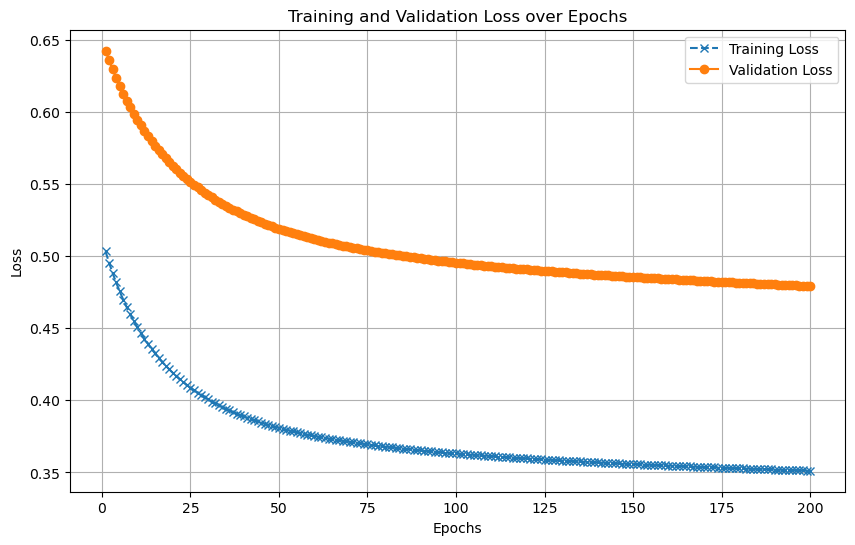

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss', marker='x', linestyle='--')
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss', marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

In [22]:
# Perform forward pass on the test set
_, y_pred_test, test_loss = forward_pass(X_test, weights, y_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_test, axis=1)  # Predicted classes
y_true_classes = np.argmax(y_test, axis=1)      # True classes

# Calculate test accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print("Test Loss:", test_loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.430081591267197
Test Accuracy: 0.7666666666666667


In [23]:
# Inspect the learned weights
print("Learned Weights (Feature Importance):")
print(weights)

# Normalize the weights for each class to make them comparable
normalized_weights = weights / np.linalg.norm(weights, axis=0)
print("Normalized Weights (Feature Importance):")
print(normalized_weights)

Learned Weights (Feature Importance):
[[-1.24078155  0.13834645  0.28526864]
 [ 1.35291794 -1.05879419  0.01658816]
 [-1.8174283  -0.6448615   0.97227403]]
Normalized Weights (Feature Importance):
[[-0.48032556  0.11090697  0.28149787]
 [ 0.52373527 -0.84879418  0.0163689 ]
 [-0.70355435 -0.51696042  0.95942223]]


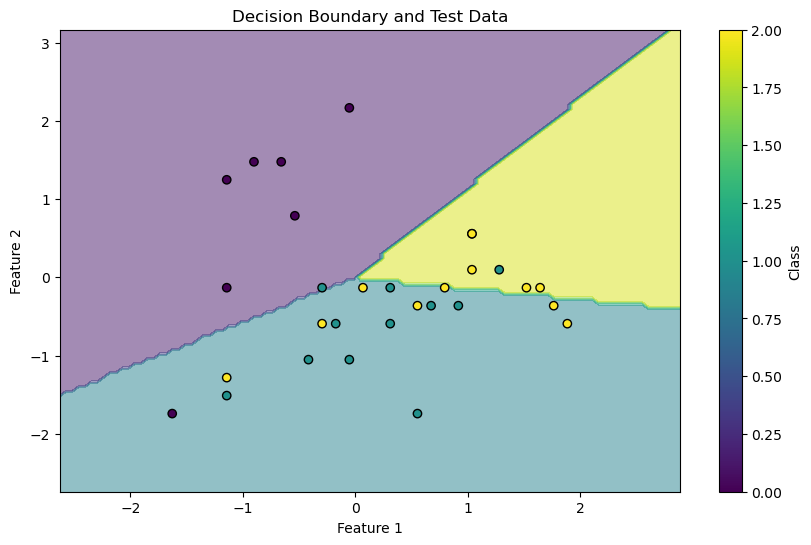

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a grid of points over the feature space
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Flatten the grid points and predict probabilities for each point
grid_points = np.c_[xx.ravel(), yy.ravel()]
# Add dummy features if necessary to match dimensions
if grid_points.shape[1] < X_test.shape[1]:
    grid_points = np.hstack([grid_points, np.zeros((grid_points.shape[0], X_test.shape[1] - 2))])

# Predict probabilities for each grid point
_, y_pred_grid, _ = forward_pass(grid_points, weights)

# Get the predicted class for each grid point
grid_predictions = np.argmax(y_pred_grid, axis=1)

# Reshape the predictions to match the grid shape
grid_predictions = grid_predictions.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, grid_predictions, alpha=0.5, cmap='viridis')

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.argmax(y_test, axis=1), cmap='viridis', edgecolor='k', marker='o')
plt.title("Decision Boundary and Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()

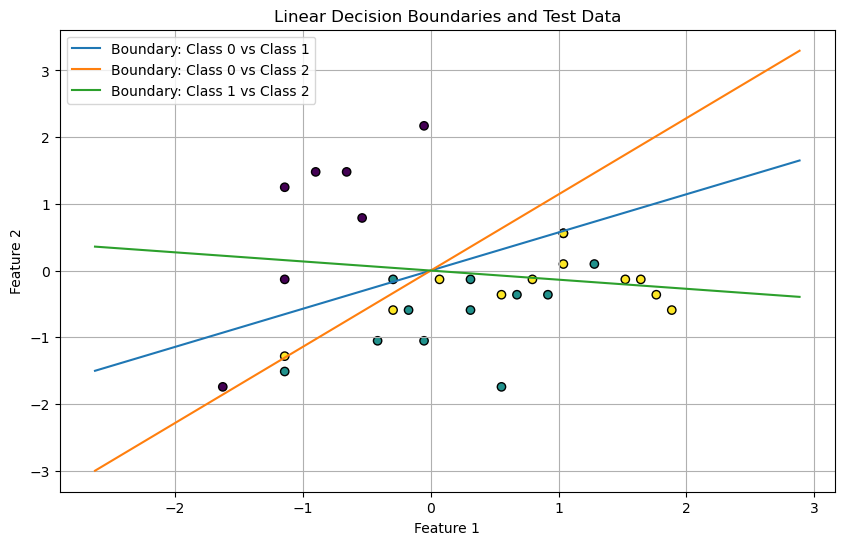

In [25]:
# Plot decision boundaries explicitly as lines (only for 2D features)
plt.figure(figsize=(10, 6))

# Decision boundaries (one line for each pair of classes)
for i in range(weights.shape[1]):
    for j in range(i + 1, weights.shape[1]):
        # Compute boundary line equation: X(W_i - W_j) = 0
        w_diff = weights[:, i] - weights[:, j]
        slope = -w_diff[0] / w_diff[1]  # Slope of the line
        intercept = 0  # Assuming zero bias for simplicity

        # Plot the line
        x_vals = np.linspace(x_min, x_max, 100)
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, label=f"Boundary: Class {i} vs Class {j}")

# Scatter plot for data
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.argmax(y_test, axis=1), cmap='viridis', edgecolor='k')
plt.title("Linear Decision Boundaries and Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()